In [1]:
import glob
import matplotlib.pyplot as plt
import wandb

import numpy as np
import os

from datasets import Dataset, Image

from dataclasses import dataclass

In [2]:
root="data/Shoe vs Sandal vs Boot Dataset"
filenames=glob.glob(root+"/*/*.*",recursive=True)
print(f"Num files: {len(filenames)}")

Num files: 15000


In [4]:
dataset=Dataset.from_dict({'image':filenames[:50]}).cast_column("image", Image())

In [6]:
from torchvision import transforms

preprocess = transforms.Compose(
    [
        transforms.Resize((128, 128)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5], [0.5]),
    ]
)

In [7]:
def transform(examples):
    images = [preprocess(image.convert("RGB")) for image in examples["image"]]
    return {"images": images}


dataset.set_transform(transform)

In [9]:
import torch

train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=16, shuffle=True)

In [10]:
sample_image = dataset[0]["images"].unsqueeze(0)
print("Input shape:", sample_image.shape)

Input shape: torch.Size([1, 3, 128, 128])


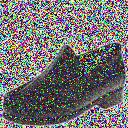

In [104]:
import torch
from PIL import Image
from diffusers import DDPMScheduler

noise_scheduler = DDPMScheduler(num_train_timesteps=1000,beta_schedule='squaredcos_cap_v2')
noise = torch.randn(sample_image.shape)
timesteps = torch.LongTensor([150])
noisy_image = noise_scheduler.add_noise(sample_image, noise, timesteps)

Image.fromarray(((noisy_image.permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0])


In [105]:
noise_imgs=[]
for step in range(400):
    timesteps = torch.LongTensor([step])
    noise = torch.randn(sample_image.shape)
    noisy_image = noise_scheduler.add_noise(sample_image, noise, timesteps)

    noise_imgs.append(Image.fromarray(((noisy_image.permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0]))

In [103]:
noise_imgs[0].save('noise_squared_cap.gif',save_all=True,append_images=noise_imgs[1:],optimize=False,duration=1)

In [59]:
((noisy_image.permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0].shape

(128, 128, 3)

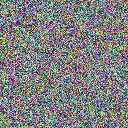

In [37]:
noise_pil = transforms.ToPILImage()(noise[0])
noise_pil

In [42]:
image_pil.size

(128, 128)

In [45]:
sample_image[0].size()

torch.Size([3, 128, 128])

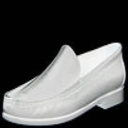

In [40]:
image_pil = transforms.ToPILImage()((sample_image[0]+1)*127.5)
image_pil

In [60]:
sample_image.permute(0,2,3,1).numpy()[0].shape

(128, 128, 3)

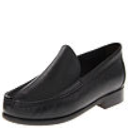

In [64]:
Image.fromarray((127.5*(sample_image.permute(0,2,3,1)+1)).type(torch.uint8).numpy()[0])